# Data Visualizations

In [69]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [70]:
trainers = pd.read_csv('../data/final_df.csv')
trainers.columns

Index(['type', 'gender', 'last_type', 'material', 'brand', 'sole_material',
       'lining_material', 'season', 'made_in', 'insole_material', 'Name',
       'Rating', 'Code', 'CMR Price', 'Event Price', 'Full Price',
       'discipline', 'interior_material'],
      dtype='object')

In [71]:
sns.displot

<function seaborn.distributions.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)>

# Figure Level

Se crean a nivel macro y no se modifican cosas demasiado específica. Permite crear graficos complejos esteticos de forma sencilla.

Vemos que los tenis de moda son los más proveidos por falabella, seguidos de los tenis deportivos. Además, vemos que existen tipos como lo son la sandalias, mocacines y botas que no hacen parte de la categoria a seleccionar (tennis), por lo que deben ser eliminadas.

In [73]:
filtered = trainers[(trainers['type'] == 'Sandalias') | (trainers['type'] == 'Mocasines') | (trainers['type'] == 'Botines') | (trainers['type'] == 'Zapatos Formales') | (trainers['type'] == 'Calzado escolar') | (trainers['type'] == 'Zapatos con luces')]

trainers.drop(filtered.index, inplace=True)

In [74]:
trainers.shape

(3048, 18)

/Users/paulatorres/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


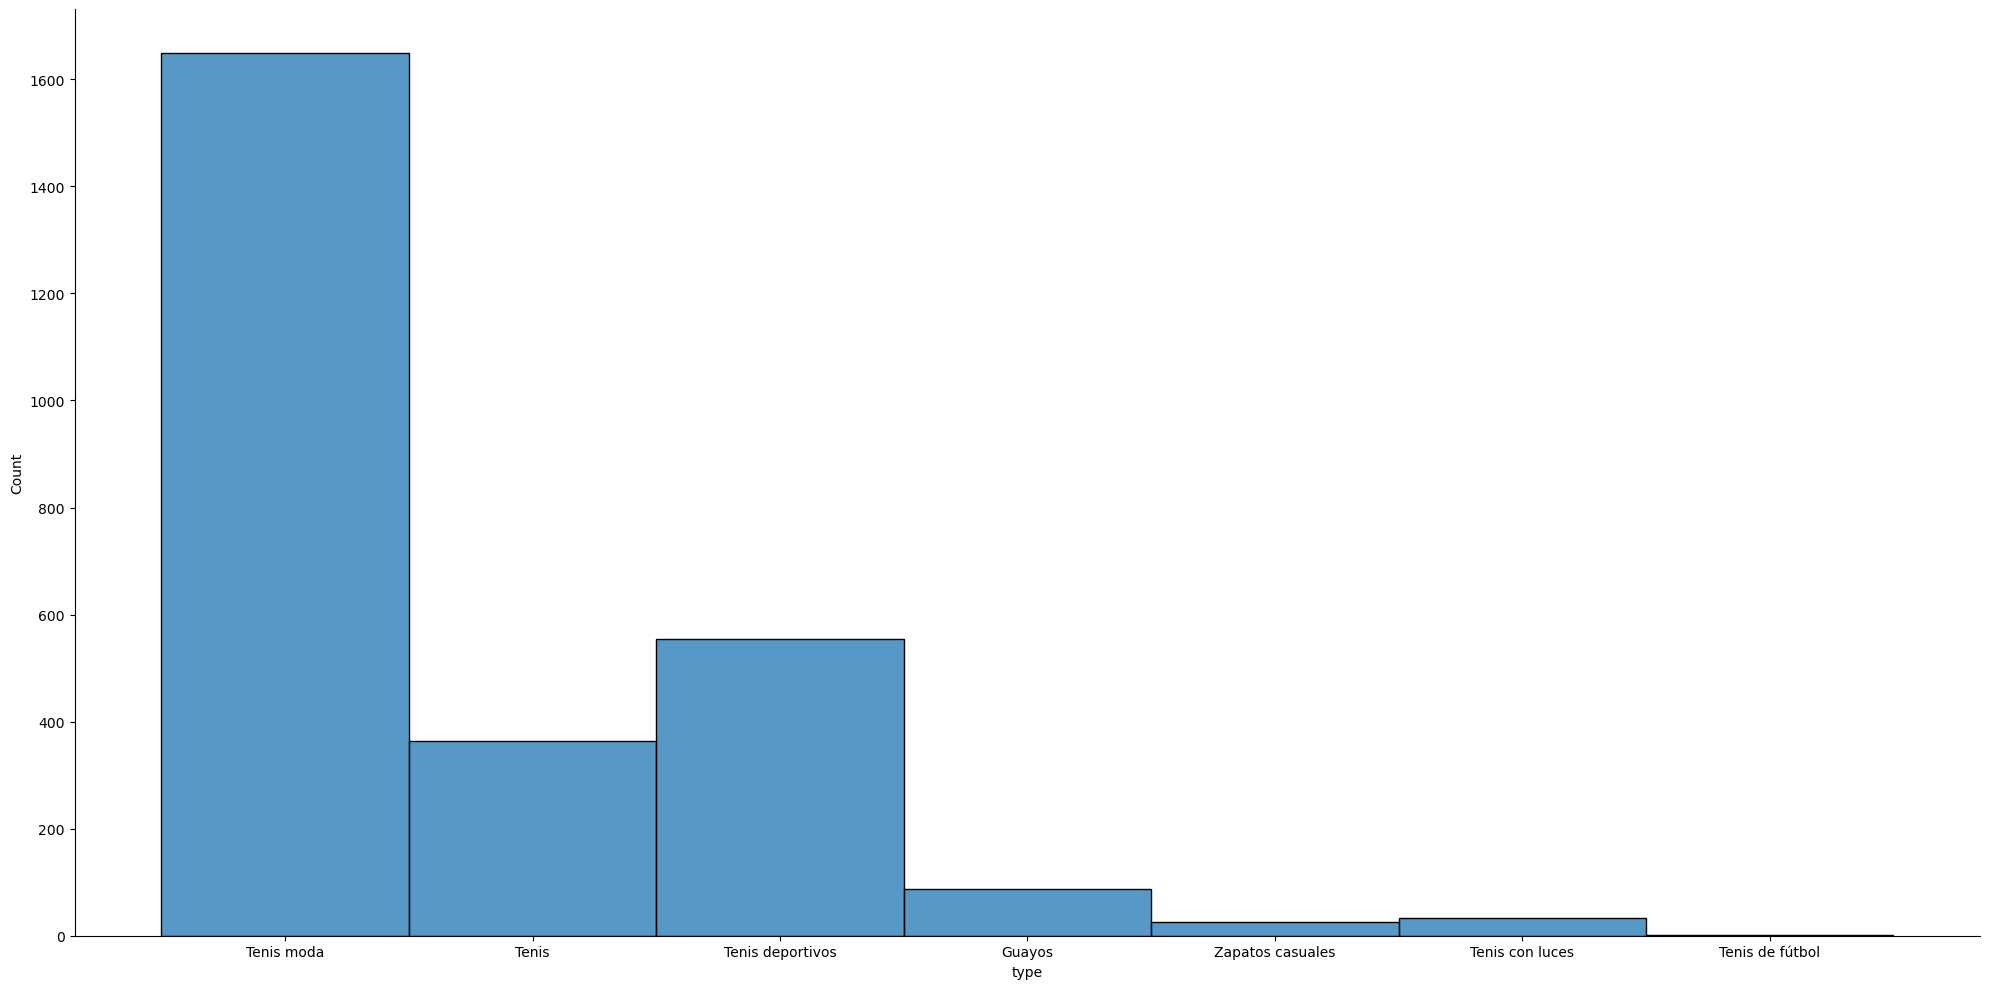

In [209]:
sns.displot(data=trainers, x='type', multiple="stack", height=10, aspect=2)


Evidentemente, los tenis de moda son los más comercializados por falabella, seguidos de los tenis comunes y deportivos.

In [109]:
trainers['gender'] = trainers['gender'].fillna('Unknown')
counts = trainers['gender'].value_counts(normalize=True)
temp = trainers['gender'].apply(lambda x: 'otros' if counts[x] < 0.05 else x)


In [100]:
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

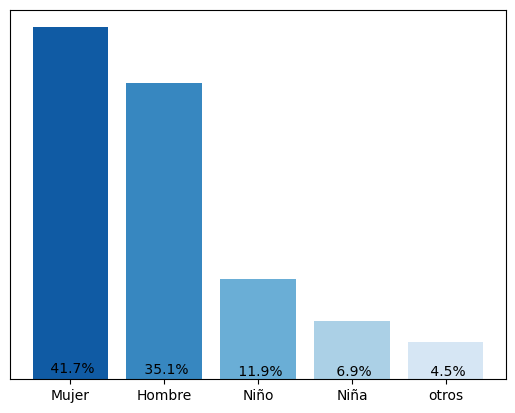

In [126]:
import matplotlib.ticker as ticker
# scale of colors from dark blue to light blue
plt.bar(temp.value_counts().index, temp.value_counts(normalize=True) * 100, color=sns.color_palette("Blues", len(temp.value_counts().index))[::-1])

# gca = |get current axis| yaxis = |eje y| set_major_formatter = |establecer formato|  FuncFormatter = |Formateador de función|
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.001%}'.format(y)))

plt.gca().axes.get_yaxis().set_visible(False)
# Añadir etiquetas a las barras 
# ha = |horizontal alignment| va = |vertical alignment|
for i, v in enumerate(temp.value_counts(normalize=True)):
    plt.text(i, v, " {:.1%}".format(v), ha='center', va='bottom')

plt.show()

Exite una mayor comenrcializacion de tenis para adultos que para niños.

In [182]:
trainers['Rating'] = trainers['Rating'].fillna(0)

/Users/paulatorres/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


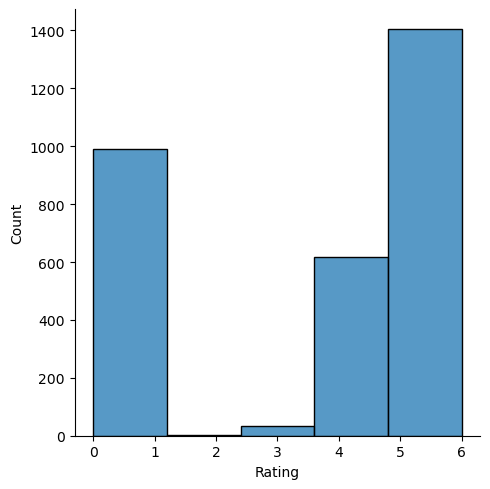

In [207]:
sns.displot(data=trainers, x='Rating', height=5, aspect=1, binwidth=1.2)


Una buena parte de las personas no rankea los tenis por este medio, sin embargo lo que son calificados en su mayoría obtienen muy buenas calificaciones

# Axes level

In [ ]:
trainers['Full Price'] = trainers['Full Price'].apply(lambda x: str(x).replace('.', '') if isinstance(x, float) else x).astype(float)

In [145]:
trainers['CMR Price'] = trainers['CMR Price'].apply(lambda x: str(x).replace('.', '') if isinstance(x, float) else x).astype(float)
trainers['Event Price'] = trainers['Event Price'].apply(lambda x: str(x).replace('.', '') if isinstance(x, float) else x).astype(float)

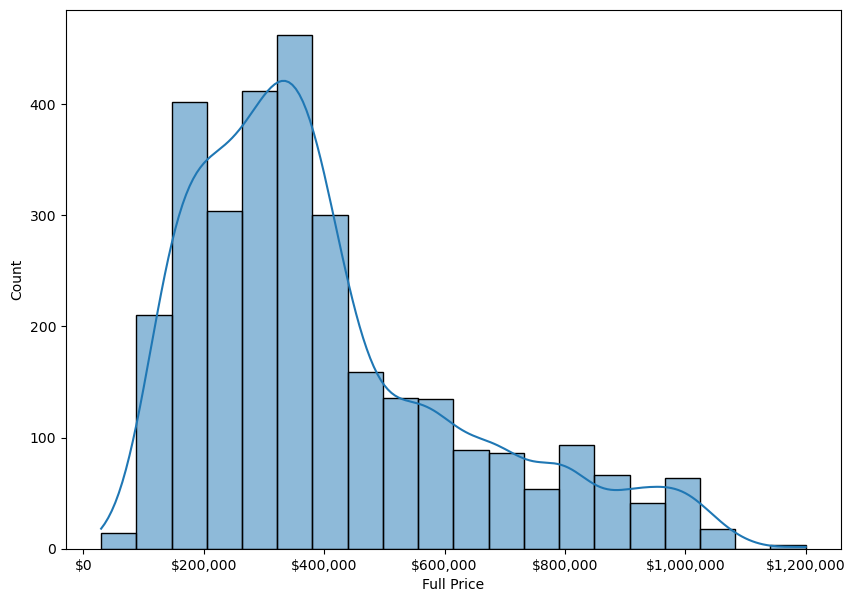

In [174]:
plt.figure(figsize=(10, 7))
sns.histplot(trainers['Full Price'], bins=20, kde=True)
# format the x axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

La mayoria de lo s precios se encuentra entre los 100 y 500 mil pesos. Tambien se aprecia que existen tennis que superan el millón de pesos como unos que llegan a bajar de los 100 mil.

([<matplotlib.patches.Wedge at 0x2821b2710>,
 [Text(-0.6030909218520054, 0.9199355085981291, 'No'),
  Text(0.603090921852005, -0.9199355085981294, 'Yes')],
 [Text(-0.32895868464654837, 0.5017830046898886, '68.5%'),
  Text(0.3289586846465481, -0.5017830046898887, '31.5%')])

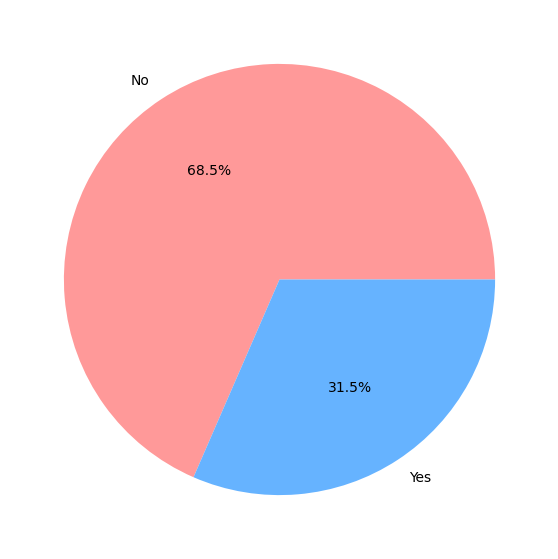

In [173]:
trainers['is_discounted'] = trainers['Event Price'] < trainers['Full Price']
trainers['is_discounted'].value_counts(normalize=True)

plt.figure(figsize=(7, 7))
plt.pie(trainers['is_discounted'].value_counts(normalize=True), labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])


La mayoria de los tennis no tienen descuento en el precio de venta.